# **EDA on Telecom Churn**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# importing dataset
df= pd.read_csv('/content/churn-bigml-80.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.shape

(2666, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

Since we don't have any null values that means we can move on to uni-variate analysis

## 1. Basic visualisation of the data

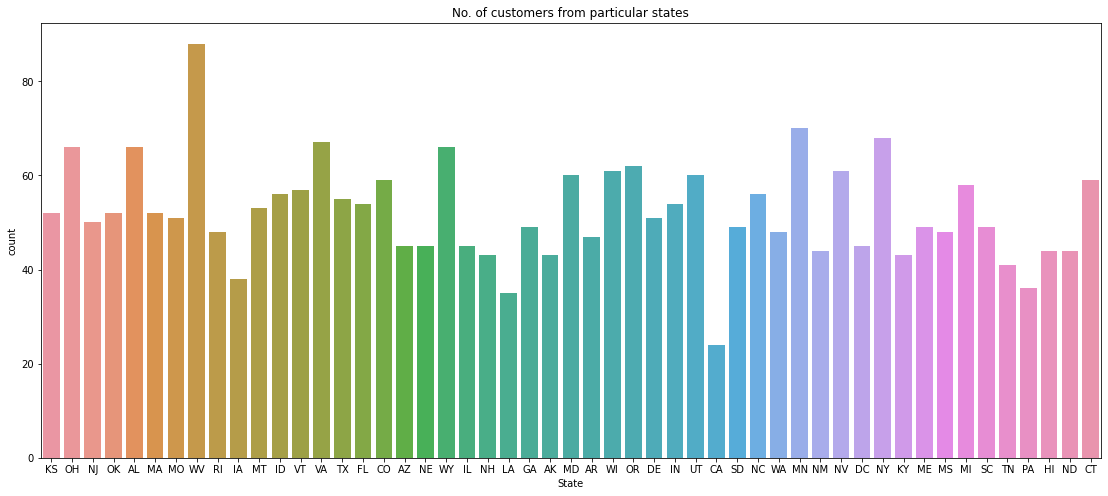

In [ ]:
plt.figure(figsize = (19,8))
sns.countplot(data = df, x = 'State')
plt.xlabel('State')
plt.title('No. of customers from particular states')
plt.show()


### Finding:
<ul><li>we can see that State WV has the highest count of customers</li></ul>

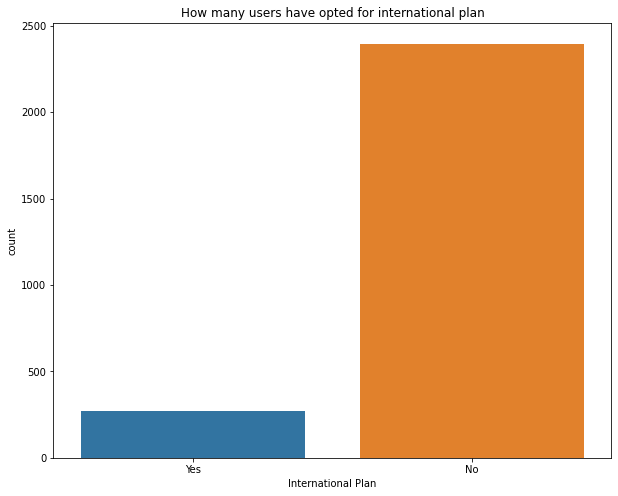

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(data = df, x = 'International plan', order= df['International plan'].value_counts(ascending = True).index)
plt.xlabel('International Plan')
plt.title('How many users have opted for international plan')
plt.show()

### Finding:
<ul><li>we can see that not many users opt for inernational plan</li></ul>

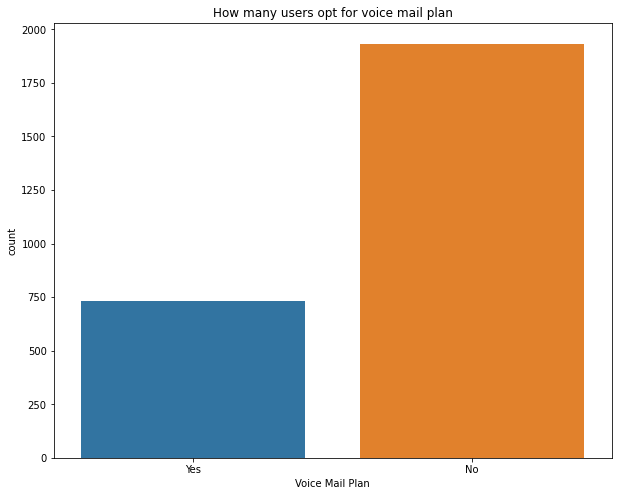

In [ ]:
plt.figure(figsize= (10,8))
sns.countplot(data = df, x = 'Voice mail plan')
plt.xlabel('Voice Mail Plan')
plt.title('How many users opt for voice mail plan')
plt.show()

### Finding: 
<ul><li>we can see thay not many users opt for voice mail plan</li></ul>

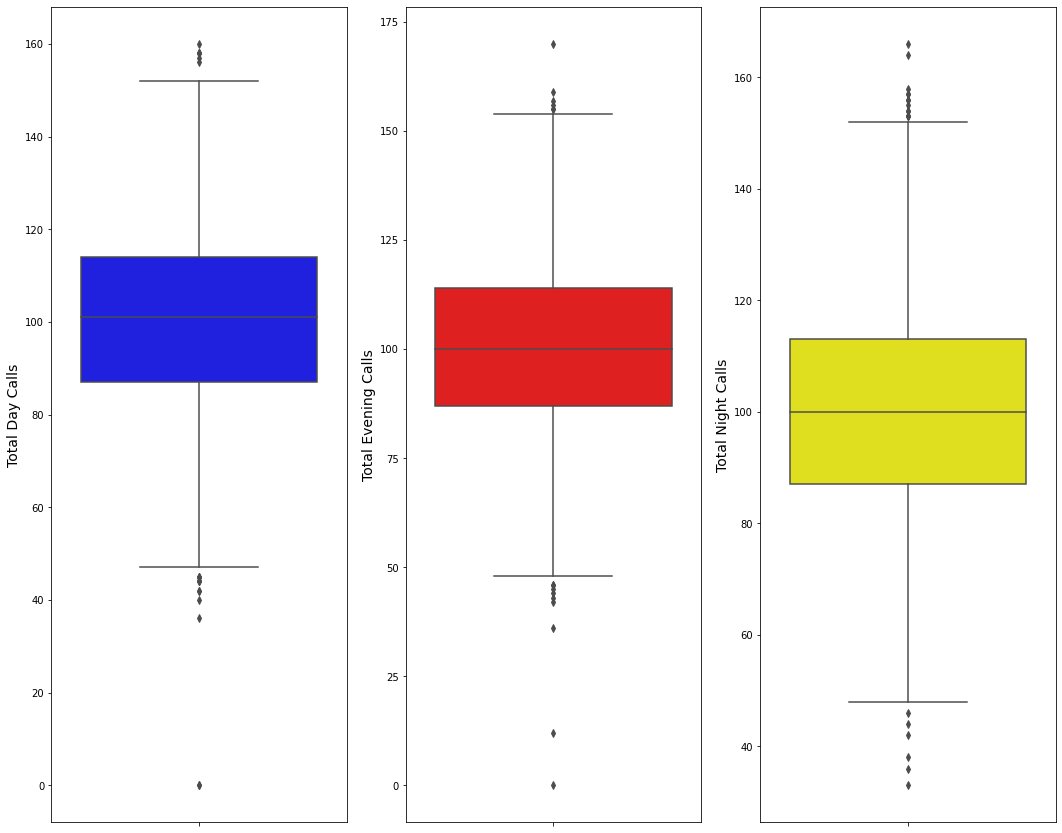

In [ ]:
# comparing total day, evening and night calls columns
plt.figure(figsize = (18,15))
plt.subplot(1,3,1,)
sns.boxplot(data = df, y= 'Total day calls', color = 'Blue')
plt.ylabel('Total Day Calls', fontsize = 14)

plt.subplot(1,3,2)
sns.boxplot(data = df, y = 'Total eve calls', color = 'Red')
plt.ylabel('Total Evening Calls', fontsize = 14)

plt.subplot(1,3,3)
sns.boxplot(data = df, y = 'Total night calls', color = 'Yellow')
plt.ylabel('Total Night Calls', fontsize = 14)

plt.show()

### Finding:
<ul><li>we can see that more calls are made during the morning as compared to evening and night. Lowest calls are made during the night.</li></ul>

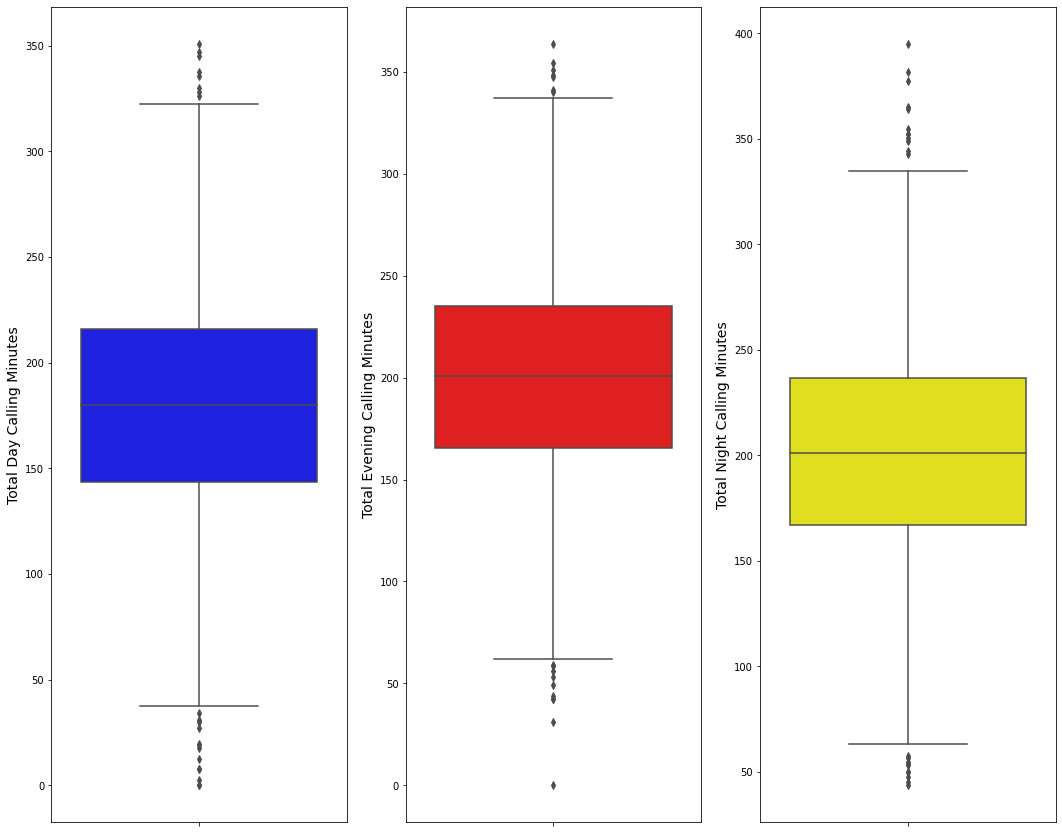

In [ ]:
plt.figure(figsize = (18,15))
plt.subplot(1,3,1,)
sns.boxplot(data = df, y = 'Total day minutes', color = 'Blue')
plt.ylabel('Total Day Calling Minutes', fontsize = 14)

plt.subplot(1,3,2)
sns.boxplot(data = df, y = 'Total eve minutes', color = 'Red')
plt.ylabel('Total Evening Calling Minutes', fontsize = 14)

plt.subplot(1,3,3)
sns.boxplot(data = df, y = 'Total night minutes', color = 'Yellow')
plt.ylabel('Total Night Calling Minutes', fontsize = 14)

plt.show()

### Finding:
<ul><li>Despite having more calls made during the day time, we can see that user do not spend longer time on calls in the morning compared to evening, with night having the least calls minutes.</li></ul>

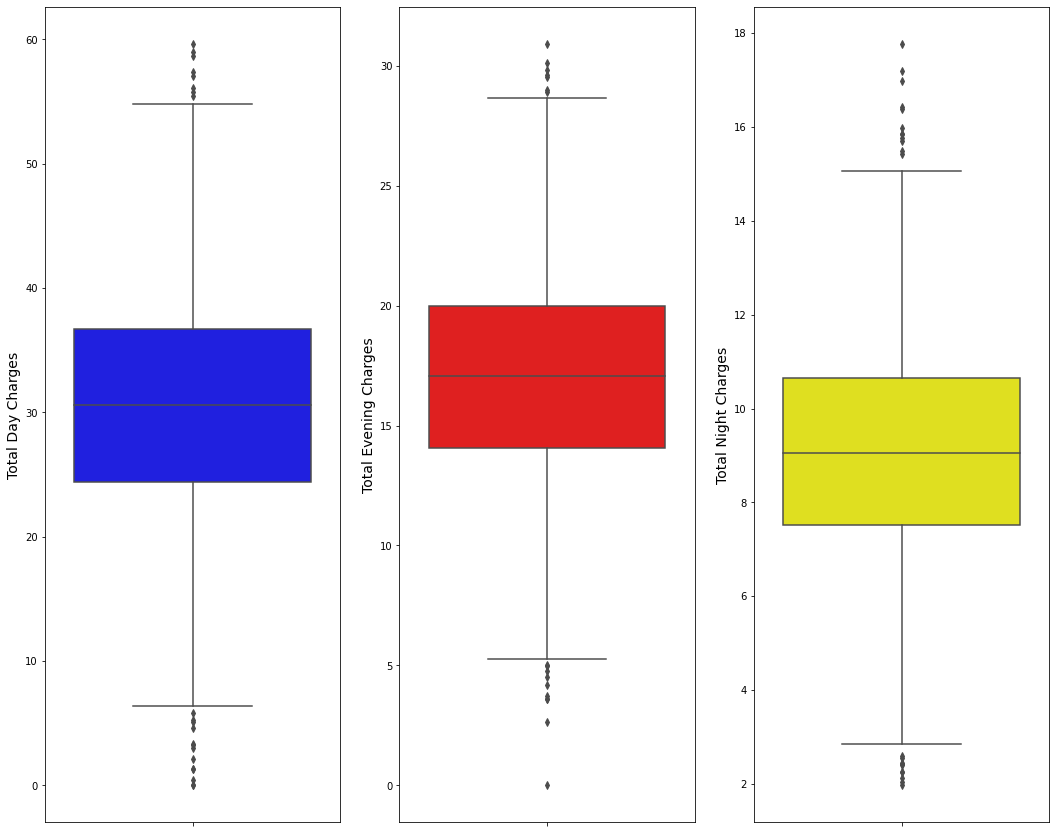

In [ ]:
plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data = df, y = 'Total day charge', color = 'Blue')
plt.ylabel('Total Day Charges', fontsize = 14)

plt.subplot(1,3,2)
sns.boxplot(data = df, y = 'Total eve charge', color = 'Red')
plt.ylabel('Total Evening Charges', fontsize = 14)

plt.subplot(1,3,3)
sns.boxplot(data = df, y = 'Total night charge', color = 'Yellow')
plt.ylabel('Total Night Charges', fontsize = 14)

plt.show()




### Finding:
<ul><li>Call charges in the  evening time are the highest and lowest in the night time.</li></ul>

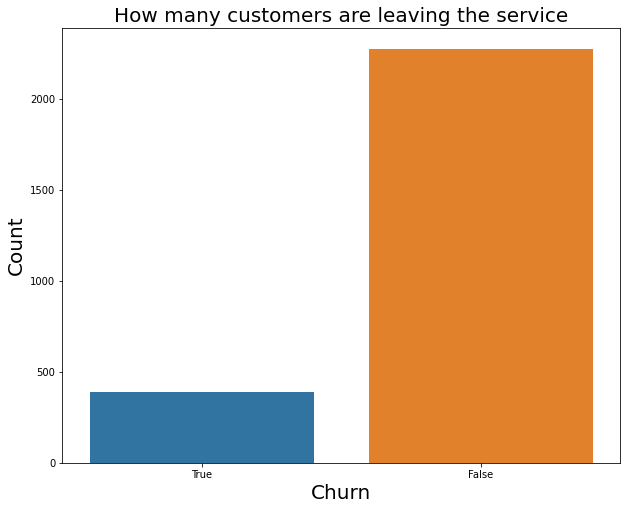

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(data = df, x = 'Churn', order= df['Churn'].value_counts(ascending = True).index)
plt.xlabel('Churn', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('How many customers are leaving the service', fontsize = 20)
plt.show()

### Finding:
<ul><li>Not many customers are leaving the service.</li></ul>

In [ ]:
# creating new dataframe as dftotal
dftotal = pd.DataFrame(df['Churn'])

In [ ]:
# creating 3 columns for total calls, total minutes and total charges
dftotal['Total calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls']

dftotal['Total minutes'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes']

dftotal['Total charges'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge']

dftotal.head()

,Churn,Total calls,Total minutes,Total charges
0,False,300,707.2,72.86
1,False,329,611.5,55.54
2,False,328,527.2,59.00
3,False,248,558.2,65.02
4,False,356,501.9,49.36


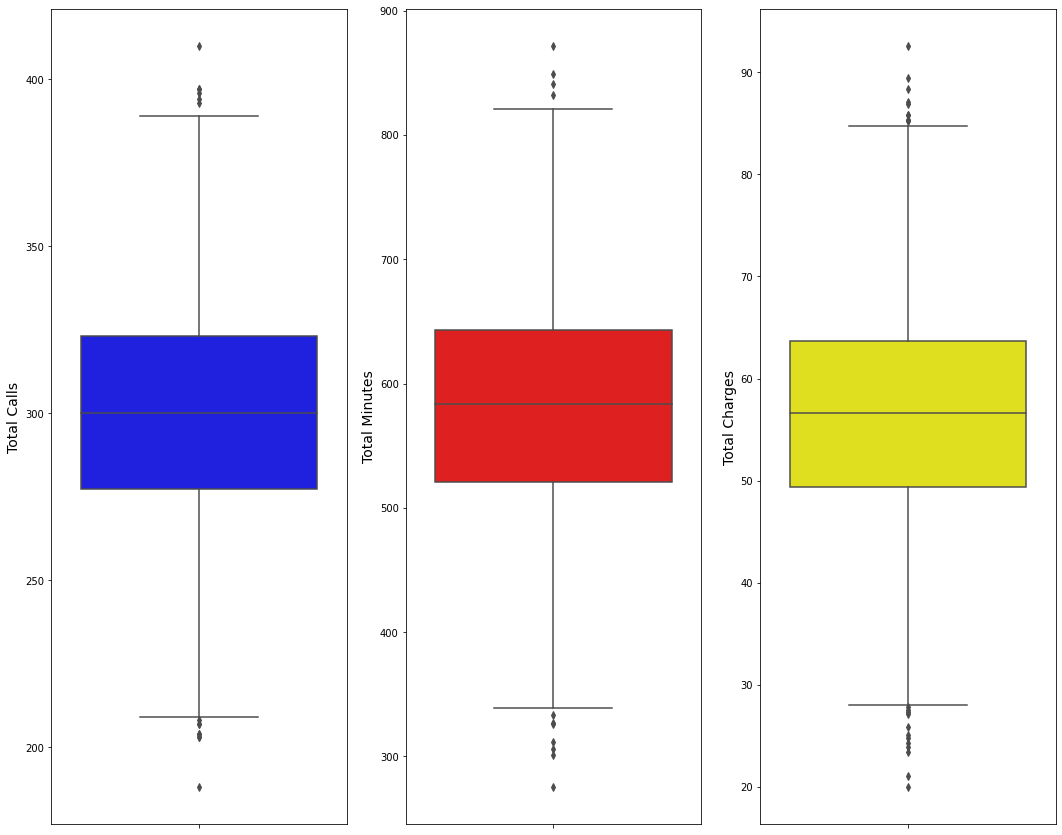

In [ ]:
plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data = dftotal, y = 'Total calls', color = "Blue")
plt.ylabel('Total Calls', fontsize = 14)

plt.subplot(1,3,2)
sns.boxplot(data = dftotal, y = 'Total minutes', color = "Red")
plt.ylabel('Total Minutes', fontsize = 14)

plt.subplot(1,3,3)
sns.boxplot(data = dftotal, y = 'Total charges', color = "Yellow")
plt.ylabel('Total Charges', fontsize = 14)

plt.show()

### Finding:
<ul><li>Each attribute is consistent to each other suggesting normal pricing for calls made.</li></ul>

## 2. Bi-variate analysis

In [ ]:
# Building heatmap to chaeck correlation between each variable
corr = df.corr()

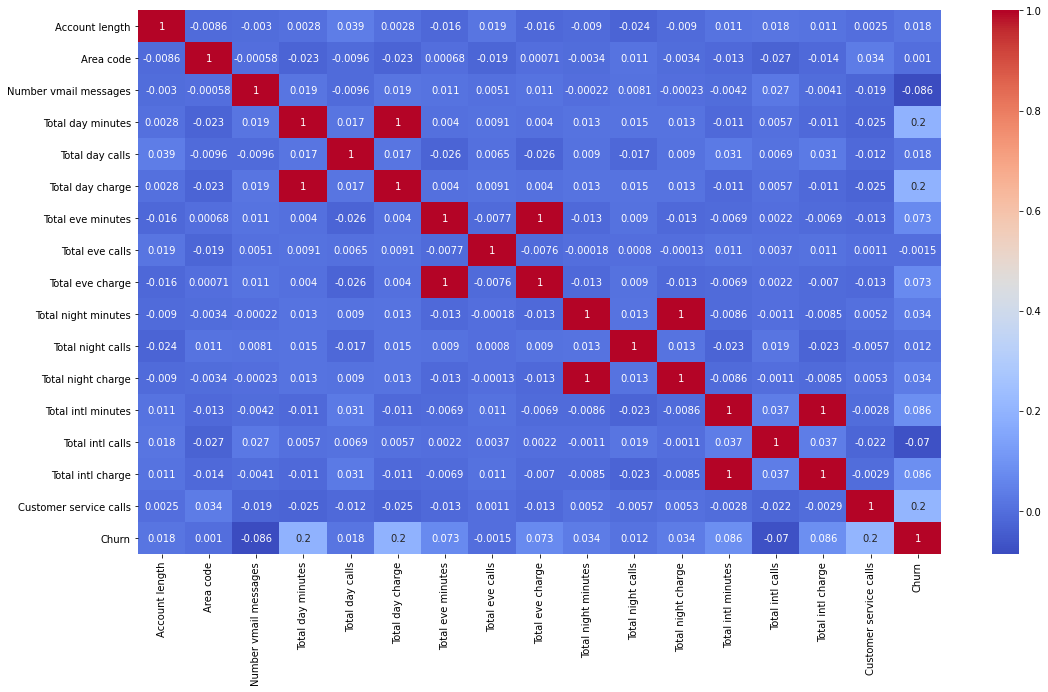

In [ ]:
plt.figure(figsize = (18,10))
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm')
plt.show()

### Finding:
With regard to the heatmap we can see high correlation bettween the following variables:

With respect to churn
<ul><li>Total day minutes to Churn at 0.2</li>
<li>Total day charge to Churn at 0.2</li>
<li>Customer service calls to Churn at 0.2</li></ul>
Other relations:
<ul><li>Total day charge to Total day minutes at 1</li>
<li>Total evening charge to total eve minutes at 1</li>
<li>total night charge to total night minutes at 1</li></ul>

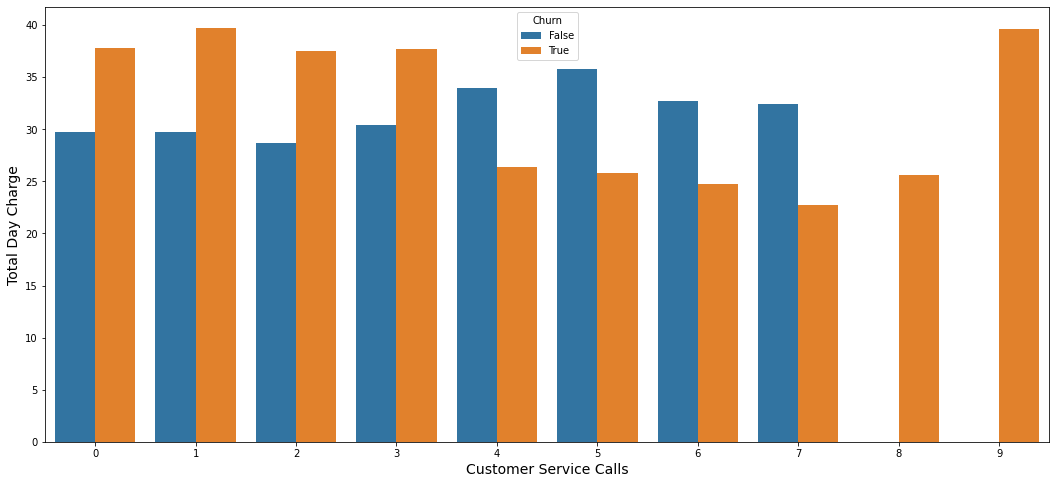

In [ ]:
# How does Total day minutes related to churn 
plt.figure(figsize = (18,8))
sns.barplot(data = df, x = 'Customer service calls', y = 'Total day charge', hue = 'Churn', ci = False)
plt.xlabel('Customer Service Calls', fontsize = 14)
plt.ylabel('Total Day Charge', fontsize = 14)
plt.show()

## Inference:

<ul><li>We can see that if customer service calls are made more than 7 times, then the service is bound to be cancelled. This also comes with high charges imposed on the user.</li>
<li>At the same time we can see that many users leave the service over 1 to 3 calls made to the customer service when are charged more. Analysis of the total day charge to the minutes spoken over churn rate could give us a better understanding of the same.</li></ul>

<Figure size 1296x576 with 0 Axes>

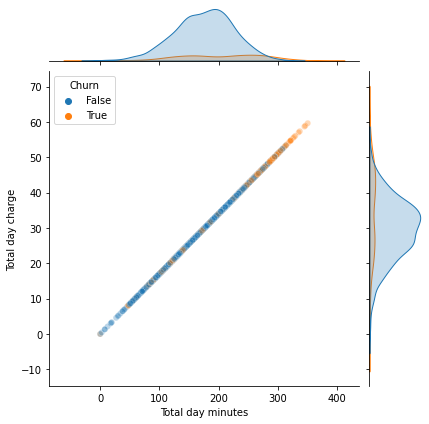

In [ ]:
plt.figure(figsize= (15,8))
sns.jointplot(data = df, x = "Total day minutes", y = 'Total day charge', hue = 'Churn', alpha = 0.3)
plt.xlabel('Total Day Minutes', fontsize = 14)
plt.ylabel('Total Day Charge', fontsize = 14)
plt.show()

## Finding
<ul><li>A linear relationship cna be observed betweent the two variables.</li>
<li>Churn can be seen with higher chrges imposed when spoken for longer duration.</li></ul>

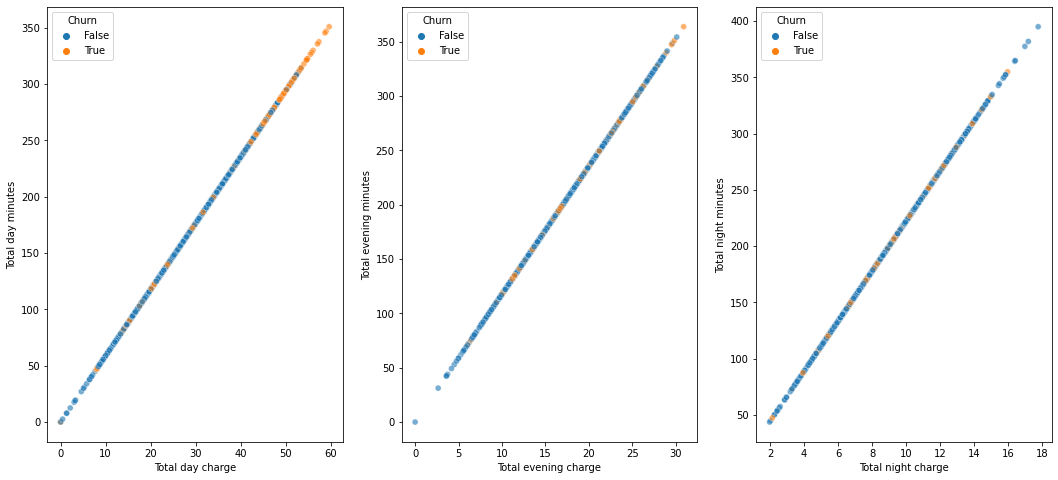

In [ ]:
plt.figure(figsize = (18,8))
plt.subplot(1,3,1)
sns.scatterplot(data = df, x = 'Total day charge', y = 'Total day minutes', hue = 'Churn', alpha = 0.6)
plt.xlabel('Total day charge', fontsize = 10)
plt.ylabel('Total day minutes', fontsize = 10)

plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'Total eve charge', y = 'Total eve minutes', hue = 'Churn', alpha = 0.6)
plt.xlabel('Total evening charge', fontsize = 10)
plt.ylabel('Total evening minutes', fontsize = 10)

plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'Total night charge', y = 'Total night minutes', hue = 'Churn', alpha = 0.6)
plt.xlabel('Total night charge', fontsize = 10)
plt.ylabel('Total night minutes', fontsize = 10)

plt.show()

## Finding:
<ul><li>We can observe from three scatterplots that churn rate is maximum during the Day time.</li>
<li>In the evening and night time churn rate is not so relevant</li></ul>

<Figure size 1296x576 with 0 Axes>

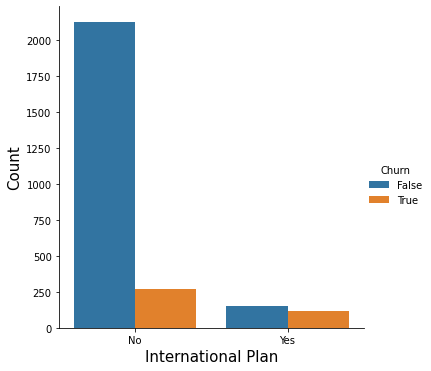

In [ ]:
# Now comparing International plan users with the Churn
plt.figure(figsize= (18,8))
sns.catplot(data = df, x = 'International plan', hue = 'Churn', kind = 'count')
plt.xlabel('International Plan', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

## Finding:
<ul><li>People who have international plan have almost equal churn rate</li></ul>

# Conclusion
<ul><li>Based on the observation i can tell that most of the people who leave service are the ones who use their service during 'Day' time.</li>
<li>I observed that people who use service during 'Day' speaks for a shorter period of time as compared to 'Evening' and 'Night' but make more calls.</li>
<li>Lastly, People with internation plans are more consistent with their churn as compared to the ones who do nat have the service.</li></ul>

Prescription:
<ul><li>Decreasing call rates for the ones who are making more calls to reduce the churn.</li>
<li>Improvement in the customer service can be done to reduce the number of calls which cause the churn.</li></ul>